In [1]:
# importing the required modules
import pandas as pd
import openpyxl as xl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = r'https://github.com/Aussachaa/SFG/raw/main/DB_Performance_SFG.xlsx'
df = pd.read_excel(path, engine="openpyxl")

df = df.drop(columns=['GL', 'File_Name', 'Brand_Code'])
Acc_lst = ['TOTAL:SALES', 'DISCOUNT', 'NET SALES', 'COST OF GOODS SOLD',
           'GROSS PROFIT', 'TOTAL EXPENSE', 'NET PROFIT BEFORE TAX']
df = df[df['ACC Name'].isin(Acc_lst)]
df

,Brand,ACC Name,Period,Amount,ACT_FC
0,CL,TOTAL:SALES,JAN,16260.242500,Actual
1,CL,DISCOUNT,JAN,-5222.221770,Actual
2,CL,NET SALES,JAN,11038.020730,Actual
3,CL,COST OF GOODS SOLD,JAN,-4353.000290,Actual
4,CL,GROSS PROFIT,JAN,6685.020440,Actual
...,...,...,...,...,...
43669,CLEAR,NET SALES,M01-12,0.000000,Forecast
43670,CLEAR,COST OF GOODS SOLD,M01-12,0.000000,Forecast
43671,CLEAR,GROSS PROFIT,M01-12,0.000000,Forecast
43675,CLEAR,TOTAL EXPENSE,M01-12,-628.116104,Forecast


In [3]:
col_index = ['Brand', 'ACC Name', 'Period', 'ACT_FC']
rename_dict = {'COST OF GOODS SOLD': 'Cogs', 'DISCOUNT': 'Discount', 'GROSS PROFIT': 'Gross Profit', 'NET SALES': 'Net Sale', 'TOTAL EXPENSE': 'Expense', 'TOTAL:SALES': 'Sale', 'NET PROFIT BEFORE TAX': 'Net Profit'}
month_dict = {'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, 'MAY':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9, 'OCT':10, 'NOV':11, 'DEC':12}

df2 = df.groupby(col_index).sum()

df2.rename(index=rename_dict, level=1, inplace=True)

df2 = df2.unstack(level=3)

df2 = df2.droplevel([0], axis=1).reset_index()

df2 = df2.loc[(df2['ACC Name'].isin(['Net Sale', 'Gross Profit', 'Net Profit'])) & (df2['Period'].str.len() == 3)]

df2 = df2.sort_values('Period', key = lambda x : x.apply(lambda x : month_dict[x]))

df2

ACT_FC,Brand,ACC Name,Period,Actual,Forecast
4400,GR,Gross Profit,JAN,0.99330,0.000000
7340,OL,Gross Profit,JAN,0.00000,0.000000
872,CA,Gross Profit,JAN,0.00000,0.000000
10896,VO,Net Profit,JAN,-17.09882,-35.307917
8572,RN,Net Sale,JAN,0.00000,0.000000
...,...,...,...,...,...
9942,ST,Net Sale,DEC,0.00000,131.323107
1906,CO,Net Sale,DEC,0.00000,0.000000
5014,HD,Net Profit,DEC,0.00000,0.006379
7198,OD,Net Sale,DEC,0.00000,0.000000


In [4]:
df3 = df2.loc[df2['ACC Name'] == 'Net Sale']
df3

ACT_FC,Brand,ACC Name,Period,Actual,Forecast
8572,RN,Net Sale,JAN,0.00000,0.000000
3476,FF,Net Sale,JAN,26.17149,0.000000
4848,HC,Net Sale,JAN,4283.22986,5380.244905
7396,OL,Net Sale,JAN,0.00000,0.000000
928,CA,Net Sale,JAN,0.00000,0.000000
...,...,...,...,...,...
1710,CM,Net Sale,DEC,0.00000,0.000000
5042,HD,Net Sale,DEC,0.00000,0.000000
9942,ST,Net Sale,DEC,0.00000,131.323107
1906,CO,Net Sale,DEC,0.00000,0.000000


In [7]:
brand = 'EF'
df4 = df3.loc[df3['Brand'] == brand]
df4 = df4.drop(columns=['Brand', 'ACC Name'])
df4 = df4.assign(ACperFC = lambda x: (df4['Actual']/df4['Forecast']))
#df4['ACperFC'] = df4['ACperFC'].map('{:.2%}'.format)
display(df4)

ACT_FC,Period,Actual,Forecast,ACperFC
2692,JAN,1585.94890,2683.748504,0.590945
2691,FEB,521.71686,2675.337289,0.195010
2707,MAR,2610.07933,4239.835700,0.615609
2688,APR,1151.53560,3410.850943,0.337609
2708,MAY,2252.27982,4013.280850,0.561207
2694,JUN,4669.35110,4360.022616,1.070947
2693,JUL,2817.37210,3724.499251,0.756443
2689,AUG,0.00000,4680.387102,0.000000
2715,SEP,0.00000,5788.477314,0.000000
2710,OCT,0.00000,5573.448052,0.000000


C:\Users\aussa\AppData\Local\Temp\ipykernel_23452\338676299.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


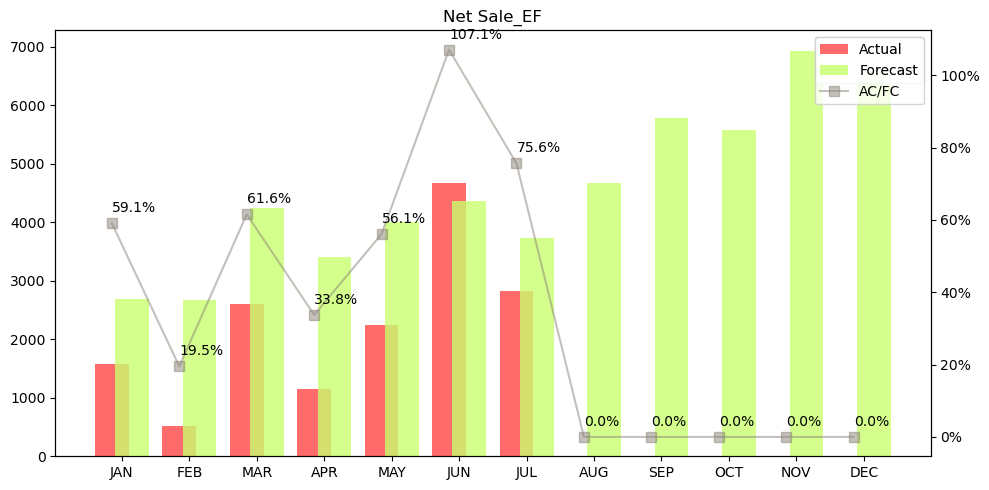

In [8]:
x_p = df4['Period']
y_ac = df4['Actual']
y_fc = df4['Forecast']
y_acperfc = df4['ACperFC']

#define subplots
fig,ax = plt.subplots(figsize=(10,5))

#Bar Actual
ax.bar(x_p, y_ac, color='#FF6A6A', width=0.5, label='Actual')

#Bar Forecast
pos = np.arange(len(x_p))
ax.bar([x + 0.3 for x in pos], y_fc, width=0.5, color='#CAFF70', alpha=0.8, label='Forecast')   # ระยะขยับกราฟแต่ละเเท่ง

#Line AC/FC
ax2 = ax.twinx()
ax2.plot(x_p, y_acperfc, color='#8B8378', marker='s', markersize=7, alpha=0.5, label='AC/FC')

plt.xticks([r + 0.3/2 for r in range(len(x_p))], df4["Period"])
plt.title('Net Sale_' + brand)
ax.legend(loc='upper right')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

for tx, ty in list(zip(x_p, y_acperfc)):
    ax2.annotate("{:,.1%}".format(ty), 
                 (tx, ty), 
                 textcoords='offset points', 
                 xytext=(0, 8), 
                 ha='left', 
                 fontsize=10)

# Change format axis2 Y
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

plt.tight_layout()
plt.show()

[  0  10  20  30  40  50  60  70  80  90 100]


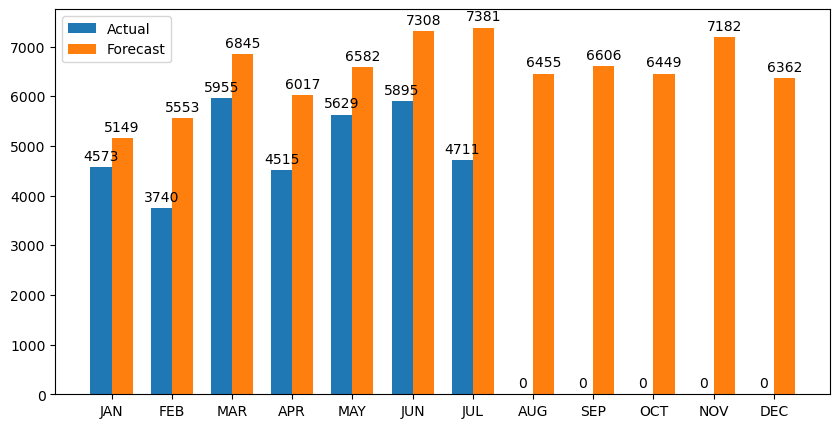

In [ ]:
indx = np.arange(len(x_p))              # [ 0  1  2  3  4  5  6  7  8  9 10 11]
score_label = np.arange(0, 110, 10)     # [  0  10  20  30  40  50  60  70  80  90 100]
print(score_label)
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10,5))
bar_ac = ax.bar(indx-bar_width/2, y_ac, bar_width, label='Actual')
bar_fc = ax.bar(indx+bar_width/2, y_fc, bar_width, label='Forecast')

# insert x asix label
ax.set_xticks(indx)
ax.set_xticklabels(x_p)

#ax.set_yticks(score_label)
#ax.set_yticklabels(score_label)

ax.legend()

'''for i in indx:
    ax.annotate('{0:.0f}'.format(bar_ac[i].get_height()), 
                xy=(bar_ac[i].get_x() + bar_ac[i].get_width() / 2, bar_ac[i].get_height()), 
                xytext=(0, 3), 
                textcoords='offset points', 
                ha='center', 
                va='bottom')'''

def insert_data_labels(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax.annotate('{0:.0f}'.format(bar.get_height()), 
                    xy=(bar.get_x() + bar.get_width() / 2, bar_height), 
                    xytext=(0, 3), 
                    textcoords='offset points', 
                    ha='center', 
                    va='bottom')

insert_data_labels(bar_ac)
insert_data_labels(bar_fc)
plt.show()

In [ ]:
df5 = df4.set_index('Period')
df5.index

Index(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC'],
      dtype='object', name='Period')